In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


coefficients_df = pd.read_csv('data/a2.csv')


def calculate_rho(theta, coefficients):
    rho = coefficients[0] / 2
    for n in range(1, 13):
        rho += coefficients[n] * np.cos(n * theta)
    return rho


def polar_to_cartesian(theta, Z, coefficients, X0):
    rho = calculate_rho(theta, coefficients)
    X = rho * np.cos(theta) + X0
    Y = rho * np.sin(theta)
    return X, Y, Z


def get_points(coefficients_df):
    points = []
    for index, row in coefficients_df.iterrows():
        # Extract coefficients for the current index
        coefficients = row[['a0', 'a1', 'a2', 'a3', 'a4', 'a5',
                            'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12']].values
        Z = row['Z']

        # Create an array of theta values
        theta_values = np.linspace(0, 2 * np.pi, 360)

        # Calculate the Cartesian coordinates
        points.append(np.array(
            [polar_to_cartesian(theta, Z, coefficients, X0=0) for theta in theta_values]))
    return points


def plot_3d_head_model(coefficients_df):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Get points
    points = get_points(coefficients_df)

    # Plot the curve
    for point in points:
        ax.plot(point[:, 0], point[:, 1], point[:, 2], color='red')

    # Set labels and show the plot
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

    # points_to_stl(points, 'head.stl')

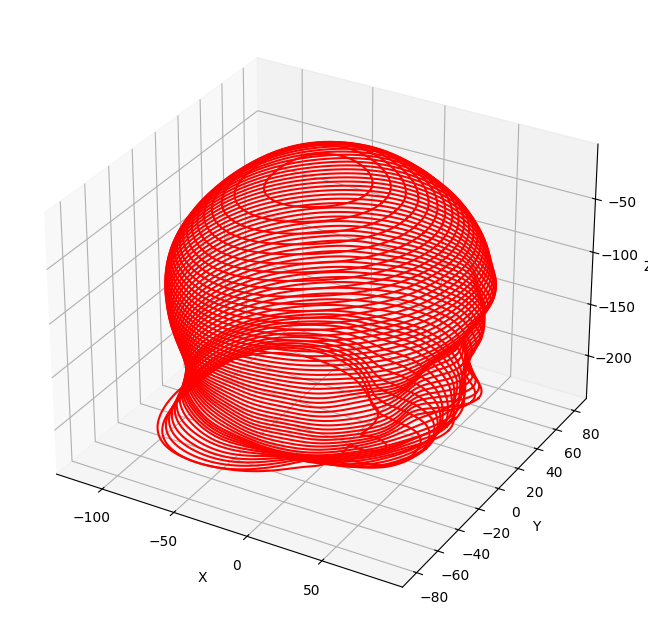

In [56]:
plot_3d_head_model(coefficients_df)